# Importing Necessary Libraries


In [182]:
# Importing pandas for data manipulation and analysis
import pandas as pd

# Importing matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler 

# Importing LogisticRegression for logistic regression modeling
from sklearn.linear_model import LogisticRegression

# Importing RandomForestClassifier for random forest modeling
from sklearn.ensemble import RandomForestClassifier

# Importing train_test_split for splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Importing confusion_matrix and accuracy_score for model evaluation
from sklearn.metrics import confusion_matrix, accuracy_score

# Importing Sequential model from Keras for building neural networks
from tensorflow.keras.models import Sequential

# Importing Dense layer for creating fully connected layers in the neural network
from tensorflow.keras.layers import Dense

# Importing Adam optimizer for training the neural network
from tensorflow.keras.optimizers import Adam

# Importing XGBClassifier from XGBoost for gradient boosting classification
from xgboost import XGBClassifier


# Loading the Credit Card Dataset


In [3]:
data = pd.read_csv(r'creditcard.csv')

# Checking the Shape of the Dataset


In [218]:
# Displaying the dimensions of the DataFrame to understand its structure
data.shape


(284807, 32)

# Displaying the Columns of the Dataset


In [219]:
# Retrieving the column names of the DataFrame to understand the features available in the dataset
data.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Hour'],
      dtype='object')

# Displaying the First 5 Rows of the Dataset


In [6]:
# Displaying the first 5 rows of the DataFrame to get an overview of the data structure and its values
data.head(5)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Summary Statistics of the Dataset


In [7]:
# Generating summary statistics for the numerical columns in the DataFrame
# This includes measures such as count, mean, standard deviation, min, max, and percentiles
data.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Overview of the Dataset


In [8]:
# Displaying information about the DataFrame, including the index dtype, column dtypes,
# non-null values, and memory usage. This helps to understand the structure and data types
# of each column in the dataset.
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Checking for Missing Values


In [9]:
# Checking for missing values in the DataFrame.
# This will return the count of null values in each column, helping to identify 
# any columns that may require imputation or other forms of handling for missing data.
data.isna().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Counting Unique Values in Each Column


In [10]:
# Counting the number of unique values in each column of the DataFrame.
# This helps to understand the diversity of data in each feature and can indicate
# whether a column is categorical, continuous, or has redundant values.
data.nunique()


Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

# Removing Duplicate Rows from the DataFrame


In [11]:
# Removing duplicate rows from the DataFrame.
# This step is essential for ensuring the integrity of the dataset, 
# as duplicate entries can skew the analysis and model training results.
data.drop_duplicates(inplace=True)


<bound method DataFrame.drop_duplicates of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388 

# Separating Original and Fraudulent Transactions


In [12]:
# Create a DataFrame containing only the original (non-fraudulent) transactions.
# This is useful for analyzing the characteristics of legitimate transactions.
original_transactions = data[data['Class'] == 0]

# Create a DataFrame containing only the fraudulent transactions.
# This allows for focused analysis and modeling on the fraud cases.
fraud_transactions = data[data['Class'] == 1]


# Counting the Number of Original Transactions


In [14]:
# Get the total number of original transactions (Class 0) in the dataset.
# This value helps to understand the scale of legitimate transactions 
# relative to the overall dataset and can be used for further analysis.
original_transactions.shape[0]


284315

# Counting the Number of Fraudulent Transactions

In [15]:
fraud_transactions.shape[0]

492

# Calculating the Percentage of Fraudulent Transactions

In [220]:
# Calculate the percentage of fraudulent transactions in the dataset.
# The formula used divides the number of fraudulent transactions 
# by the total number of transactions and multiplies by 100 to get 
# the percentage. The result is then rounded to two decimal places.
fraudulent_transactions_percentage = round(fraud_transactions.shape[0] / len(data) * 100, 2)

# Display the calculated percentage of fraudulent transactions.
fraudulent_transactions_percentage


0.17

# Calculating the Percentage of Original Transactions

In [221]:
# Calculate the percentage of original (non-fraudulent) transactions in the dataset.
# This is done by dividing the number of original transactions 
# by the total number of transactions and multiplying by 100 
# to express it as a percentage. The result is rounded to two decimal places.
original_transactions_percentage = round(original_transactions.shape[0] / len(data) * 100, 2)

# Display the calculated percentage of original transactions.
original_transactions_percentage


99.83

# Descriptive Statistics for Transaction Amounts

In [18]:
# Generate descriptive statistics for the 'Amount' column in the dataset.
# This will provide insights such as count, mean, standard deviation, 
# minimum, maximum, and the quartiles of the transaction amounts.
data['Amount'].describe()


count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

# Visualizing the Distribution of Transactions by Class

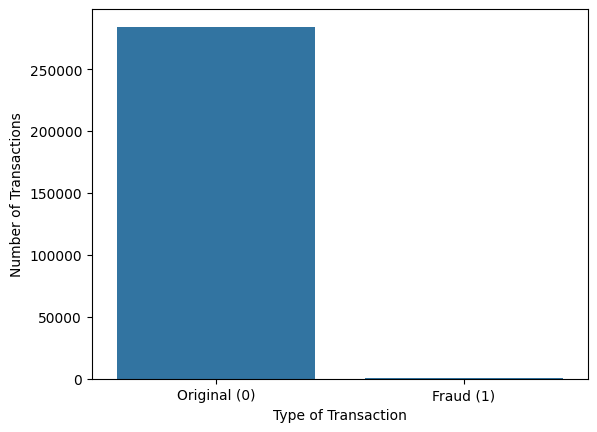

In [19]:
# Create a count plot to visualize the distribution of transactions by class.
# This will show the number of original and fraudulent transactions in the dataset.
sns.countplot(x='Class', data=data)

# Set custom labels for the x-axis ticks to make the categories clearer.
plt.xticks([0, 1], ['Original (0)', 'Fraud (1)'])

# Label the x-axis and y-axis for clarity.
plt.xlabel('Type of Transaction')
plt.ylabel('Number of Transactions')

# Display the plot.
plt.show()


# Visualizing Transaction Amount Distribution for Fraud and Original Transactions


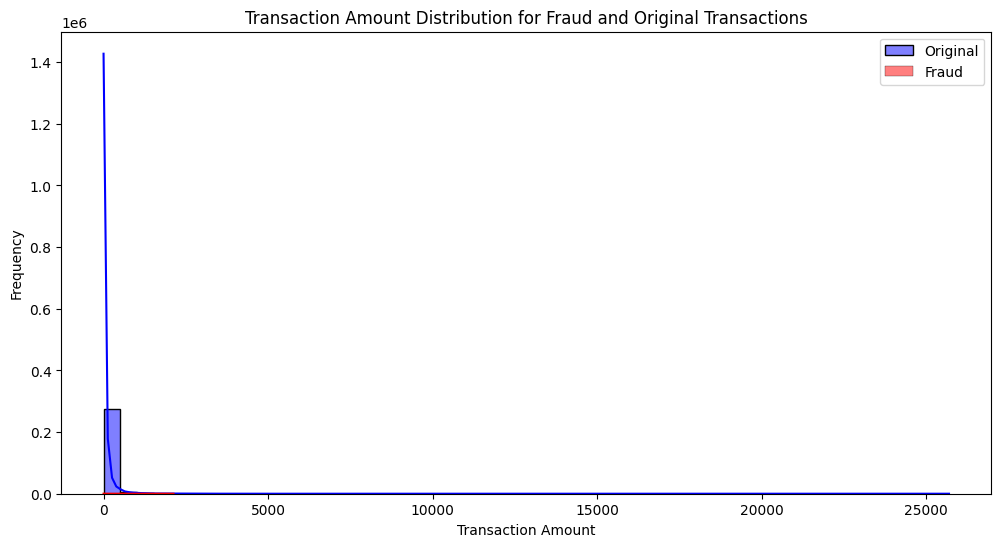

In [20]:
# Create a figure with a specified size for the transaction amount distribution.
plt.figure(figsize=(12, 6))

# Plot the histogram for original transactions with kernel density estimation (KDE) overlay.
sns.histplot(original_transactions['Amount'], bins=50, kde=True, color='blue', label='Original')

# Plot the histogram for fraudulent transactions with KDE overlay.
sns.histplot(fraud_transactions['Amount'], bins=25, kde=True, color='red', label='Fraud')

# Set the title of the plot to provide context.
plt.title('Transaction Amount Distribution for Fraud and Original Transactions')

# Label the x-axis and y-axis for clarity.
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

# Add a legend to distinguish between original and fraudulent transactions.
plt.legend()

# Display the plot.
plt.show()


# Visualizing Time Series of Fraudulent Transactions


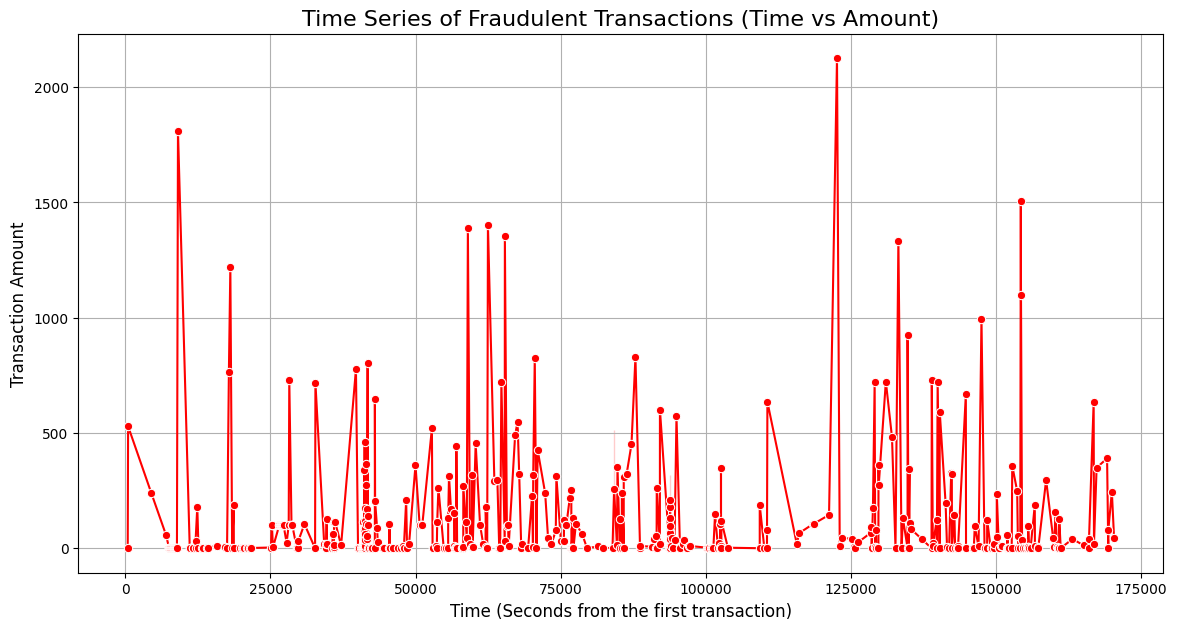

In [21]:
# Create a figure with a specified size for the time series visualization.
plt.figure(figsize=(14, 7))

# Plot a line graph for fraudulent transactions, showing the relationship between time and transaction amount.
sns.lineplot(x=fraud_transactions['Time'], y=fraud_transactions['Amount'], color='red', marker='o')

# Set the title of the plot to provide context.
plt.title('Time Series of Fraudulent Transactions (Time vs Amount)', fontsize=16)

# Label the x-axis to indicate what the time variable represents.
plt.xlabel('Time (Seconds from the first transaction)', fontsize=12)

# Label the y-axis to indicate what the amount variable represents.
plt.ylabel('Transaction Amount', fontsize=12)

# Enable grid for better readability of the plot.
plt.grid(True)

# Display the plot.
plt.show()


# Visualizing the Correlation Matrix for Fraudulent Transactions


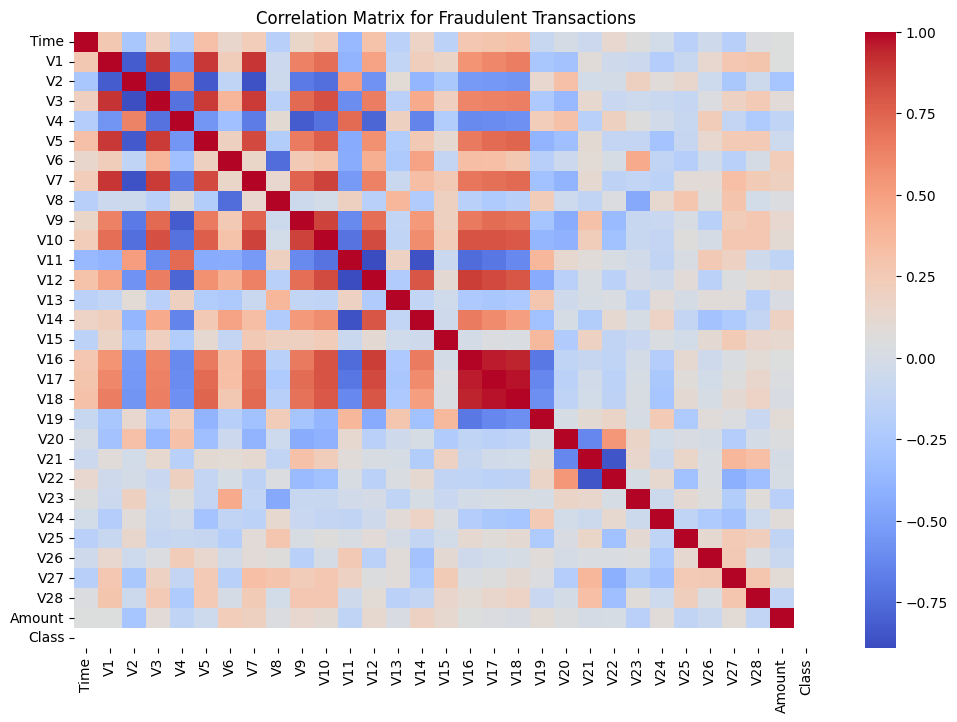

In [23]:
# Create a figure with a specified size for the correlation matrix visualization of fraudulent transactions.
plt.figure(figsize=(12, 8))

# Calculate the correlation matrix specifically for fraudulent transactions.
fraud_corr = fraud_transactions.corr()

# Create a heatmap to visualize the correlation matrix, using a coolwarm color palette.
sns.heatmap(fraud_corr, cmap='coolwarm', annot=False, fmt='.2f')

# Set the title of the heatmap for context.
plt.title('Correlation Matrix for Fraudulent Transactions')

# Display the plot.
plt.show()


# Visualizing Transaction Count by Hour of Day (Fraud vs Original)


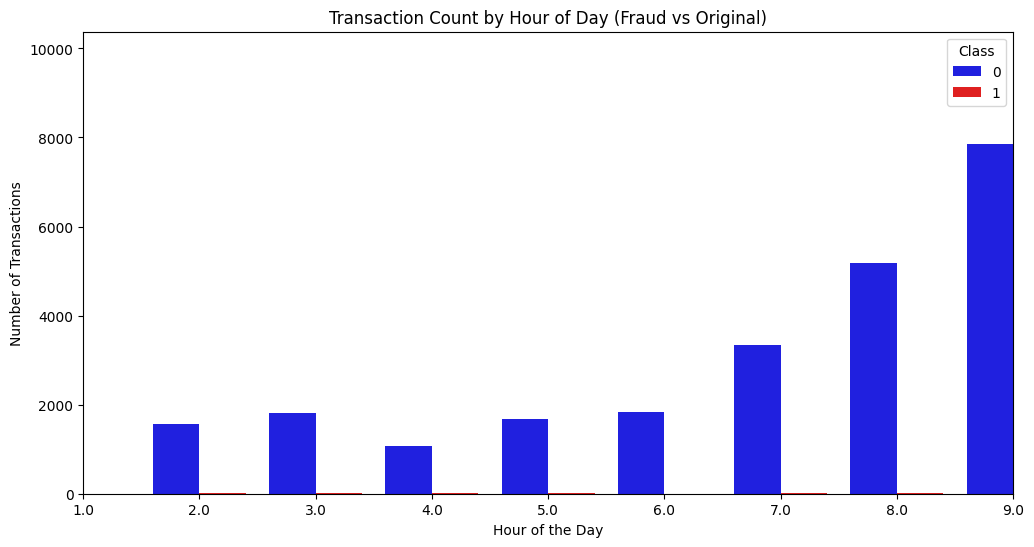

In [24]:
# Create a new column 'Hour' in the data DataFrame that converts the 'Time' in seconds to hours.
data['Hour'] = data['Time'] // 3600

# Create a figure with a specified size for the countplot visualization.
plt.figure(figsize=(12, 6))

# Create a countplot to show the number of transactions by hour of the day, with separate colors for fraud and original transactions.
sns.countplot(x='Hour', hue='Class', data=data, palette={0: 'blue', 1: 'red'})

# Set the title of the plot for context.
plt.title('Transaction Count by Hour of Day (Fraud vs Original)')

# Set the x-axis limits to display only the hours between 1 and 9.
plt.xlim([1, 9])

# Set the labels for the x-axis and y-axis.
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')

# Display the plot.
plt.show()


# Visualizing Boxplot of Transaction Amount by Class

C:\Users\chait\AppData\Local\Temp\ipykernel_27400\73754024.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=data, palette='Set3')


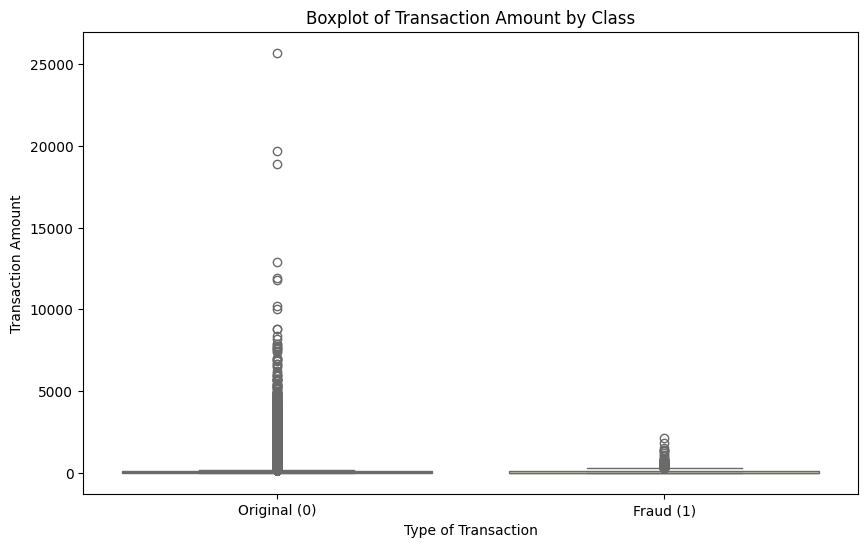

In [25]:
# Create a figure with a specified size for the boxplot visualization.
plt.figure(figsize=(10, 6))

# Create a boxplot to show the distribution of transaction amounts for both original and fraudulent transactions.
sns.boxplot(x='Class', y='Amount', data=data, palette='Set3')

# Set the title of the plot for context.
plt.title('Boxplot of Transaction Amount by Class')

# Customize the x-axis tick labels for better readability.
plt.xticks([0, 1], ['Original (0)', 'Fraud (1)'])

# Set the labels for the x-axis and y-axis.
plt.xlabel('Type of Transaction')
plt.ylabel('Transaction Amount')

# Display the plot.
plt.show()


# Preparing Features and Target Variable


In [26]:
# Separate the features (X) and the target variable (y).
# Drop the 'Class' column from the dataset to create the feature set.
X = data.drop(columns=['Class'])

# Assign the 'Class' column to the target variable.
y = data['Class']


# Feature Scaling for Amount and Time


In [141]:
# Initialize the StandardScaler to standardize the features.
scaler = StandardScaler()

# Fit and transform the 'Amount' and 'Time' columns in the feature set X.
# This will standardize these columns by removing the mean and scaling to unit variance.
X[['Amount', 'Time']] = scaler.fit_transform(X[['Amount', 'Time']])


# Splitting the Data into Training and Testing Sets


In [142]:
# Split the dataset into training and testing sets using an 80-20 split.
# The stratify parameter ensures that the proportion of classes in the target variable is preserved in both sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Initializing the Logistic Regression Model


In [207]:
# Create an instance of the LogisticRegression model from sklearn.
logistic_model = LogisticRegression()


# Training the Logistic Regression Model


In [208]:
# Fit the logistic regression model on the training data
logistic_model.fit(X_train, y_train)


d:\NEU\Fall 2024\INFO6105\Projects\Credit_Card_Fraud_Detection\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Making Predictions with the Logistic Regression Model


In [209]:
# Use the trained logistic regression model to predict the labels for the test dataset
logistic_model_test_prediction = logistic_model.predict(X_test)

# Use the trained logistic regression model to predict the labels for the training dataset
logistic_model_train_prediction = logistic_model.predict(X_train)


# Evaluating the Accuracy of the Logistic Regression Model


In [210]:
# Calculate the accuracy of the logistic regression model on the training dataset
logistic_model_train_accuracy = accuracy_score(y_train, logistic_model_train_prediction)

# Calculate the accuracy of the logistic regression model on the test dataset
logistic_model_test_accuracy = accuracy_score(y_test, logistic_model_test_prediction)


# Creating a DataFrame for Logistic Regression Model Accuracies


In [213]:
# Create a DataFrame to store the accuracy values for training and test datasets
logistic_model_accuracies = pd.DataFrame({
    'Accuracy_Type': ['Train', 'Test'],  # Labels for the accuracy types
    'Accuracy_Values': [logistic_model_train_accuracy * 100, logistic_model_test_accuracy * 100]  # Accuracy values converted to percentage
})

# Display the DataFrame containing the accuracy values
logistic_model_accuracies


,Accuracy_Type,Accuracy_Values
0,Train,99.923632
1,Test,99.915733


# Visualizing Logistic Regression Model Accuracies


C:\Users\chait\AppData\Local\Temp\ipykernel_27400\2070955614.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Accuracy_Type', y='Accuracy_Values', data=logistic_model_accuracies,palette='Set2')
C:\Users\chait\AppData\Local\Temp\ipykernel_27400\2070955614.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot.set_xticklabels([f'{acc_type}\n({value:.4f}%)' for acc_type, value in zip(logistic_model_accuracies['Accuracy_Type'], logistic_model_accuracies['Accuracy_Values'])])


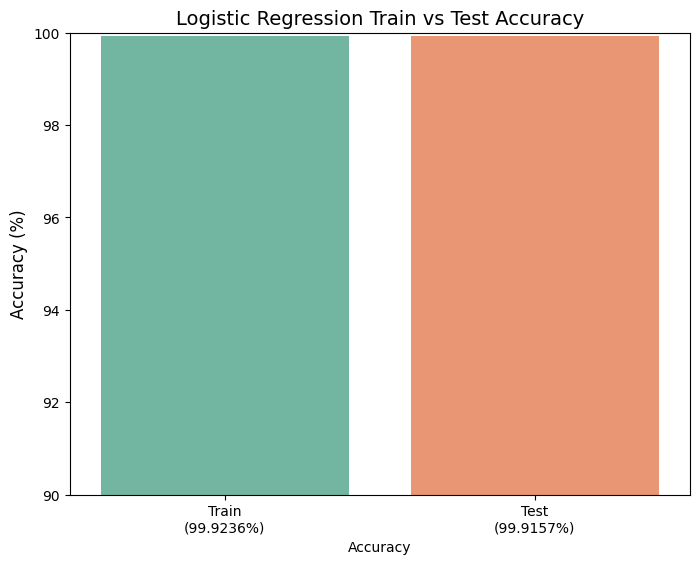

In [212]:
# Create a figure with specified size for the bar plot
plt.figure(figsize=(8, 6))

# Create a bar plot to visualize training vs test accuracy of the logistic regression model
bar_plot = sns.barplot(x='Accuracy_Type', y='Accuracy_Values', data=logistic_model_accuracies, palette='Set2')

# Set the x-tick labels to include accuracy type and value in percentage format
bar_plot.set_xticklabels([f'{acc_type}\n({value:.4f}%)' for acc_type, value in zip(logistic_model_accuracies['Accuracy_Type'], logistic_model_accuracies['Accuracy_Values'])])

# Set the title and labels for the plot
plt.title('Logistic Regression Train vs Test Accuracy', fontsize=14)
plt.xlabel('Accuracy')
plt.ylabel('Accuracy (%)', fontsize=12)

# Set y-axis limit for better visualization
plt.ylim(90, 100)

# Display the plot
plt.show()


# Building the Artificial Neural Network (ANN) Model


In [173]:
# Initialize the Sequential model for the ANN
ann_model = Sequential()

# Add the first hidden layer with 128 neurons and ReLU activation function
# input_dim is set to the number of features in the training data
ann_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

# Add the second hidden layer with 64 neurons and ReLU activation function
ann_model.add(Dense(64, activation='relu'))

# Add the third hidden layer with 32 neurons and ReLU activation function
ann_model.add(Dense(32, activation='relu')) 

# Add the output layer with 1 neuron and sigmoid activation function
# This is used for binary classification
ann_model.add(Dense(1, activation='sigmoid'))


# Compiling the ANN Model


In [174]:
# Compile the ANN model with the specified loss function, optimizer, and metrics
ann_model.compile(loss='binary_crossentropy', 
                  optimizer=Adam(learning_rate=0.001), 
                  metrics=['accuracy'])



# Training the ANN Model


In [175]:
# Train the ANN model using the training data (X_train, y_train)
# The training process will run for 15 epochs and use a batch size of 64
# Validation data (X_test, y_test) is provided to monitor the model's performance on unseen data
ann_model_training = ann_model.fit(X_train, y_train, 
                                    epochs=15, 
                                    batch_size=64, 
                                    validation_data=(X_test, y_test))


Epoch 1/15
3561/3561 [==============================] - 8s 2ms/step - loss: 0.0081 - accuracy: 0.9979 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 2/15
3561/3561 [==============================] - 7s 2ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9995
Epoch 3/15
3561/3561 [==============================] - 8s 2ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoch 4/15
3561/3561 [==============================] - 7s 2ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0044 - val_accuracy: 0.9988
Epoch 5/15
3561/3561 [==============================] - 7s 2ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 6/15
3561/3561 [==============================] - 6s 2ms/step - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0027 - val_accuracy: 0.9994
Epoch 7/15
3561/3561 [==============================] - 7s 2ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.0036 - val_accuracy:

# Evaluating the ANN Model on Testing Data


In [176]:
# Evaluate the trained ANN model using the test dataset (X_test, y_test)
# This function returns the loss and accuracy of the model on the test data
loss, accuracy = ann_model.evaluate(X_test, y_test)

# Print the test accuracy as a percentage
print(f"Test Accuracy: {accuracy * 100:.2f}%")


1781/1781 [==============================] - 2s 1ms/step - loss: 0.0031 - accuracy: 0.9995
Test Accuracy: 99.95%


# Evaluating the ANN Model on Training Data


In [177]:
# Evaluate the trained ANN model using the training dataset (X_train, y_train)
# This function returns the loss and accuracy of the model on the training data
loss, accuracy = ann_model.evaluate(X_train, y_train)

# Print the training accuracy as a percentage
print(f"Train Accuracy: {accuracy * 100:.2f}%")


7121/7121 [==============================] - 10s 1ms/step - loss: 0.0018 - accuracy: 0.9996
Train Accuracy: 99.96%


# Visualizing Model Accuracy Over Epochs


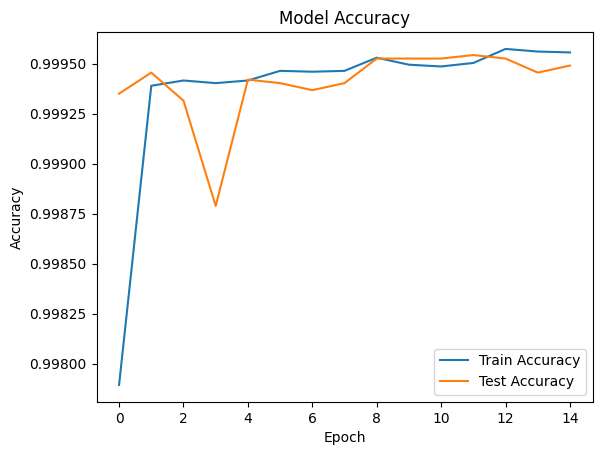

In [178]:
# Plot the training accuracy over epochs
plt.plot(ann_model_training.history['accuracy'], label='Train Accuracy')

# Plot the validation (test) accuracy over epochs
plt.plot(ann_model_training.history['val_accuracy'], label='Test Accuracy')

# Set the title for the plot
plt.title('Model Accuracy')

# Label the y-axis
plt.ylabel('Accuracy')

# Label the x-axis
plt.xlabel('Epoch')

# Show legend to differentiate between train and test accuracy
plt.legend()

# Display the plot
plt.show()


# Initializing the Random Forest Classifier


In [34]:
# Create a Random Forest Classifier with the following parameters:
# - n_estimators: The number of trees in the forest (30 trees)
# - max_depth: The maximum depth of each tree (limited to 3)
# - random_state: A seed for reproducibility (set to 42)
# - oob_score: Enable out-of-bag estimates to assess the model's performance
random_forest_model = RandomForestClassifier(n_estimators=30, max_depth=3, random_state=42, oob_score=True)


# Training the Random Forest Model


In [35]:
# Fit the Random Forest model to the training data
# This step trains the model using the features (X_train) and target labels (y_train)
random_forest_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, n_estimators=30, oob_score=True,
                       random_state=42)

# Evaluating Out-of-Bag Score for Random Forest Model


In [36]:
# Calculate the out-of-bag (OOB) score of the Random Forest model
# The OOB score provides an estimate of the model's accuracy using the samples not included in the bootstrap samples
oob_score_percentage = random_forest_model.oob_score_ * 100
oob_score_percentage


99.91836555553118

# Evaluating Feature Importances from Random Forest Model


In [180]:
# Get the feature importances from the trained Random Forest model
rf_model_important_features = random_forest_model.feature_importances_

# Extract the feature names from the training data
feature_names = X_train.columns

# Loop through each feature and its corresponding importance score
for feature_name, importance in zip(feature_names, rf_model_important_features):
    print(f"Feature {feature_name}: Importance = {importance:.4f}")


Feature Time: Importance = 0.0004
Feature V1: Importance = 0.0025
Feature V2: Importance = 0.0130
Feature V3: Importance = 0.0108
Feature V4: Importance = 0.0356
Feature V5: Importance = 0.0012
Feature V6: Importance = 0.0097
Feature V7: Importance = 0.0066
Feature V8: Importance = 0.0055
Feature V9: Importance = 0.0256
Feature V10: Importance = 0.1818
Feature V11: Importance = 0.1075
Feature V12: Importance = 0.1350
Feature V13: Importance = 0.0000
Feature V14: Importance = 0.1855
Feature V15: Importance = 0.0015
Feature V16: Importance = 0.0543
Feature V17: Importance = 0.1432
Feature V18: Importance = 0.0464
Feature V19: Importance = 0.0001
Feature V20: Importance = 0.0052
Feature V21: Importance = 0.0038
Feature V22: Importance = 0.0011
Feature V23: Importance = 0.0045
Feature V24: Importance = 0.0000
Feature V25: Importance = 0.0000
Feature V26: Importance = 0.0110
Feature V27: Importance = 0.0025
Feature V28: Importance = 0.0012
Feature Amount: Importance = 0.0029
Feature Hour: I

# Visualizing Feature Importances from Random Forest Model

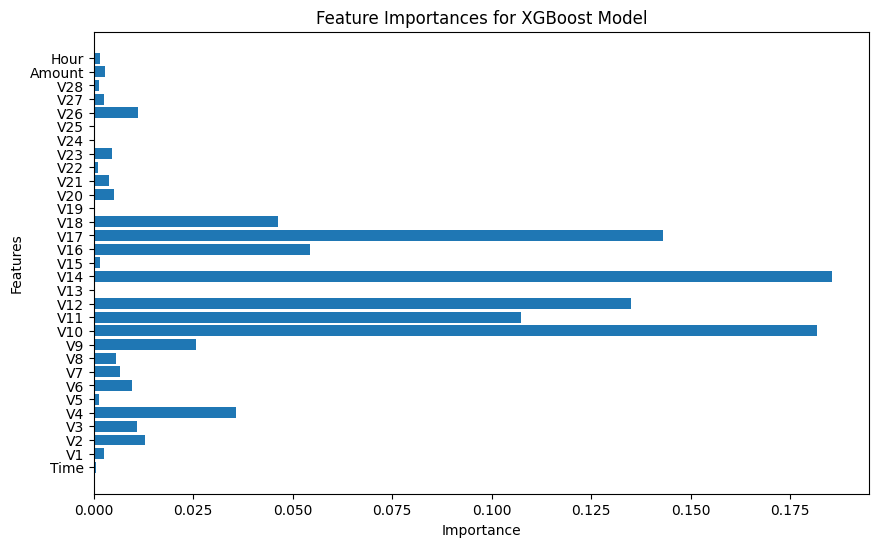

In [198]:
# Create a horizontal bar plot for the feature importances
plt.figure(figsize=(10, 6))

# Plot the feature importances as a horizontal bar chart
plt.barh(range(len(rf_model_important_features)), rf_model_important_features, align='center')

# Set the y-ticks to the feature names
plt.yticks(range(len(rf_model_important_features)), [X.columns[i] for i in range(len(rf_model_important_features))])

# Set the title and labels for the plot
plt.title('Feature Importances for Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')

# Display the plot
plt.show()


# Visualizing the Confusion Matrix for Random Forest Model Predictions


d:\NEU\Fall 2024\INFO6105\Projects\Credit_Card_Fraud_Detection\.venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


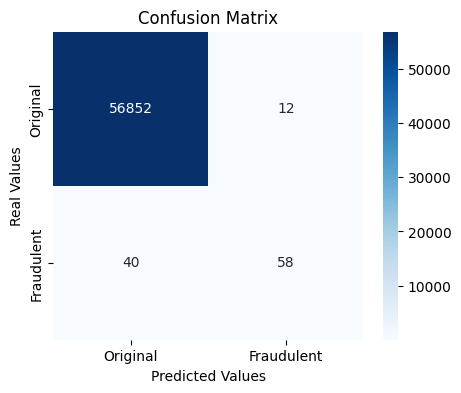

In [185]:
# Generate predictions on the test set using the trained Random Forest model
random_forest_model_prediction = random_forest_model.predict(X_test)

# Create a confusion matrix to evaluate the model's performance
confusion_matrix_data = confusion_matrix(y_test, random_forest_model_prediction)

# Set up the figure size for the heatmap
plt.figure(figsize=(5, 4))

# Create a heatmap to visualize the confusion matrix
sns.heatmap(confusion_matrix_data, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Original', 'Fraudulent'], yticklabels=['Original', 'Fraudulent'])

# Set the labels and title for the plot
plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
plt.title('Confusion Matrix')

# Display the plot
plt.show()


# Initializing the XGBoost Classifier


In [186]:
# Create an instance of the XGBoost Classifier with a fixed random state for reproducibility
xgb_model = XGBClassifier(random_state=42)


# Fitting the XGBoost Model


In [187]:

# Train the XGBoost model using the training dataset (X_train, y_train)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

# Making Predictions with the XGBoost Model


In [190]:
# Generate predictions for the training dataset
xgb_model_train_prediction = xgb_model.predict(X_train)

# Generate predictions for the test dataset
xgb_model_test_prediction = xgb_model.predict(X_test)


# Calculating and Printing Accuracy for the XGBoost Model

In [191]:
# Step 5: Calculate accuracy for both train and test sets
train_accuracy = accuracy_score(y_train, xgb_model_train_prediction)
test_accuracy = accuracy_score(y_test, xgb_model_test_prediction)

# Step 6: Print the accuracies
print("Train Accuracy:", train_accuracy * 100)
print("Test Accuracy:", test_accuracy * 100)


Train Accuracy: 100.0
Test Accuracy: 99.95084442259751


# Evaluating Feature Importances for the XGBoost Model



In [216]:
# Get the feature importances from the XGBoost model
xgboost_model_important_features = xgb_model.feature_importances_

# Print each feature's name and its corresponding importance score
for feature_name, importance in zip(feature_names, xgboost_model_important_features):
    print(f"Feature {feature_name}: Importance = {importance:.4f}")


Feature Time: Importance = 0.0186
Feature V1: Importance = 0.0188
Feature V2: Importance = 0.0080
Feature V3: Importance = 0.0115
Feature V4: Importance = 0.0298
Feature V5: Importance = 0.0084
Feature V6: Importance = 0.0117
Feature V7: Importance = 0.0629
Feature V8: Importance = 0.0130
Feature V9: Importance = 0.0114
Feature V10: Importance = 0.2438
Feature V11: Importance = 0.0110
Feature V12: Importance = 0.0382
Feature V13: Importance = 0.0179
Feature V14: Importance = 0.2808
Feature V15: Importance = 0.0140
Feature V16: Importance = 0.0162
Feature V17: Importance = 0.0241
Feature V18: Importance = 0.0126
Feature V19: Importance = 0.0121
Feature V20: Importance = 0.0143
Feature V21: Importance = 0.0154
Feature V22: Importance = 0.0092
Feature V23: Importance = 0.0086
Feature V24: Importance = 0.0117
Feature V25: Importance = 0.0070
Feature V26: Importance = 0.0146
Feature V27: Importance = 0.0108
Feature V28: Importance = 0.0123
Feature Amount: Importance = 0.0163
Feature Hour: I

# Visualizing Feature Importances for the XGBoost Model


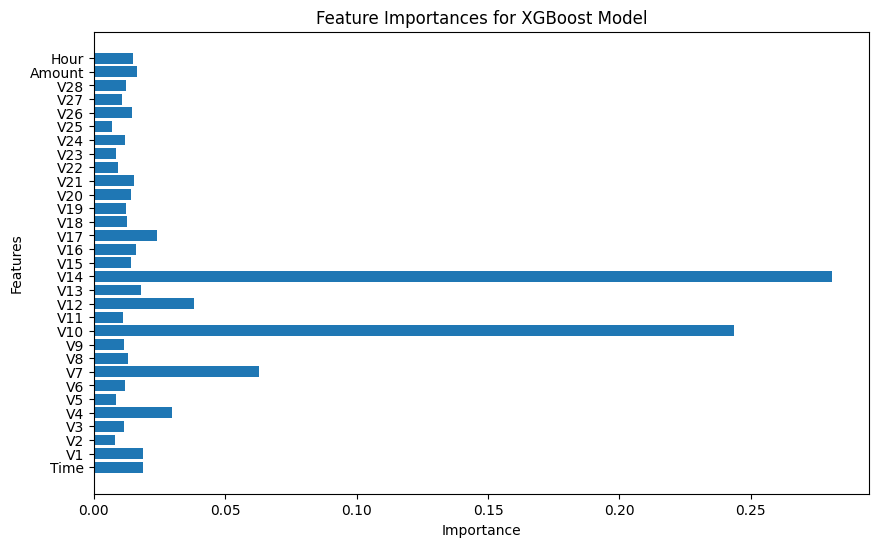

In [217]:
# Create a horizontal bar plot to visualize feature importances from the XGBoost model
plt.figure(figsize=(10, 6))

# Plot the importance scores for each feature
plt.barh(range(len(xgboost_model_important_features)), xgboost_model_important_features, align='center')

# Set the y-ticks to correspond to the feature names
plt.yticks(range(len(xgboost_model_important_features)), [X.columns[i] for i in range(len(xgboost_model_important_features))])

# Set the title and labels for the plot
plt.title('Feature Importances for XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Features')

# Display the plot
plt.show()


# Creating a DataFrame for XGBoost Model Accuracies


In [203]:
# Create a DataFrame to store the accuracy values for the XGBoost model
xgb_accuracies = pd.DataFrame({
    'Accuracy_Type': ['Train Accuracy', 'Test Accuracy'],
    'Accuracy_Values': [train_accuracy * 100, test_accuracy * 100]
})

# Display the DataFrame containing the accuracies
xgb_accuracies


,Accuracy_Type,Accuracy_Values
0,Train Accuracy,100.000000
1,Test Accuracy,99.950844


# Visualizing XGBoost Model Accuracy Comparison


C:\Users\chait\AppData\Local\Temp\ipykernel_27400\3183715953.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Accuracy_Type', y='Accuracy_Values', data=xgb_accuracies,palette='Set2')
C:\Users\chait\AppData\Local\Temp\ipykernel_27400\3183715953.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot.set_xticklabels([f'{acc_type}\n({value:.4f}%)' for acc_type, value in zip(xgb_accuracies['Accuracy_Type'], xgb_accuracies['Accuracy_Values'])])


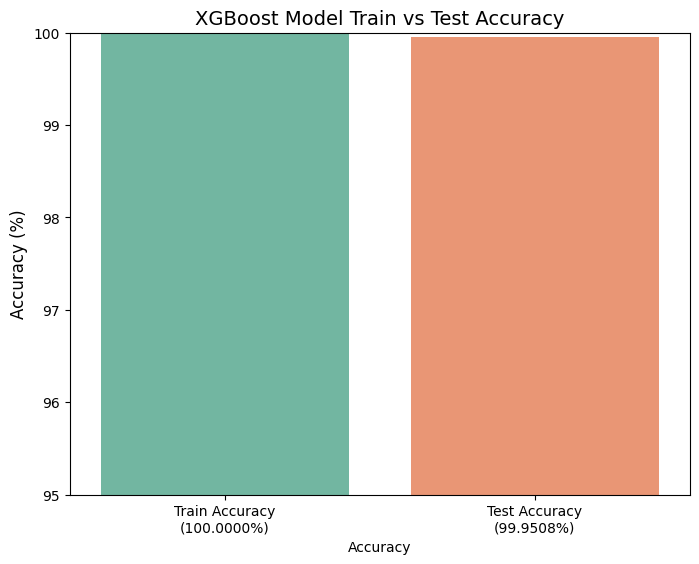

In [205]:
# Create a figure with specified size for the bar plot
plt.figure(figsize=(8, 6))

# Create a bar plot to compare train and test accuracies
bar_plot = sns.barplot(x='Accuracy_Type', y='Accuracy_Values', data=xgb_accuracies, palette='Set2')

# Set custom x-tick labels to include the accuracy values
bar_plot.set_xticklabels([f'{acc_type}\n({value:.4f}%)' for acc_type, value in zip(xgb_accuracies['Accuracy_Type'], xgb_accuracies['Accuracy_Values'])])

# Set the title of the plot
plt.title('XGBoost Model Train vs Test Accuracy', fontsize=14)

# Label the x-axis and y-axis
plt.xlabel('Accuracy')
plt.ylabel('Accuracy (%)', fontsize=12)

# Set the y-axis limits for better visualization
plt.ylim(95, 100)

# Display the plot
plt.show()
